In [17]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from behavioural_benchmark.visualisation import Visualisation
sns.set_style("white")

In [18]:
results = pd.read_csv("../../Results/characteristicTest/results.csv", names=["experiment", "dim", "population_size", "iterations", "function", "metaheuristic", "control_params"] + [f"col_{i}" for i in range(26)])

In [19]:
results.head()

,experiment,dim,population_size,iterations,function,metaheuristic,control_params,col_0,col_1,col_2,...,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25
0,characteristicTest,10,30,1000,Weierstrass,VonNeumannPSO,{c1=0.7; c2=0.7; w=0.9},34,-0.005366,0.015181,...,0.2215,-117.383496,1.4160,827.500000,18,30.03,0.018833,133.236562,53.546226,29.489577
1,characteristicTest,10,30,1000,Weierstrass,VonNeumannPSO,{c1=0.7; c2=0.7; w=0.9},10,-0.002365,0.000779,...,0.2025,-195.708316,0.9025,698.633333,33,30.03,0.136667,403.384881,120.346488,25.623119
2,characteristicTest,10,30,1000,Weierstrass,VonNeumannPSO,{c1=0.7; c2=0.7; w=0.9},30,-0.005073,0.014400,...,0.2060,-182.184176,1.3745,823.033333,26,30.03,0.017100,138.430967,116.550026,23.536547
3,characteristicTest,10,30,1000,Weierstrass,VonNeumannPSO,{c1=0.7; c2=0.7; w=0.9},67,-0.006988,0.026661,...,0.2005,-120.343867,1.2635,843.766667,9,30.03,0.029300,121.660000,62.403590,13.599434
4,characteristicTest,10,30,1000,Weierstrass,VonNeumannPSO,{c1=0.7; c2=0.7; w=0.9},99,-0.005194,0.045385,...,0.1865,-117.738442,1.2555,787.933333,30,30.03,0.017800,130.500821,109.402435,27.465251


In [20]:
vis = Visualisation(results)

In [21]:
columns = ['col_1', 'col_2', 'col_3']
metaheuristics = ['VonNeumannPSO', 'RingPSO']#, 'GBestPSO']
function = ['Weierstrass']
filter = {"metaheuristic": metaheuristics, "function": function}

In [22]:
prepped_data = vis.__prep_data__(columns=columns, filters=filter, exclude_outliers=True, normalise=True)

# KDE Plots

Text(0, 0.5, '')

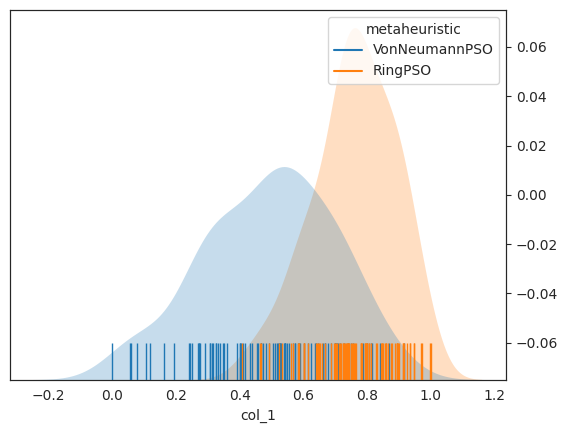

In [23]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.kdeplot(x='col_1', data=prepped_data, hue='metaheuristic', fill=True, ax=ax, linewidth=0, legend=False)
sns.rugplot(x='col_1', data=prepped_data, hue='metaheuristic', ax=ax2, legend=True, height=0.1, clip_on=True)
ax.set_yticks([])
ax.set_ylabel('')

<Axes: xlabel='col_1', ylabel='col_2'>

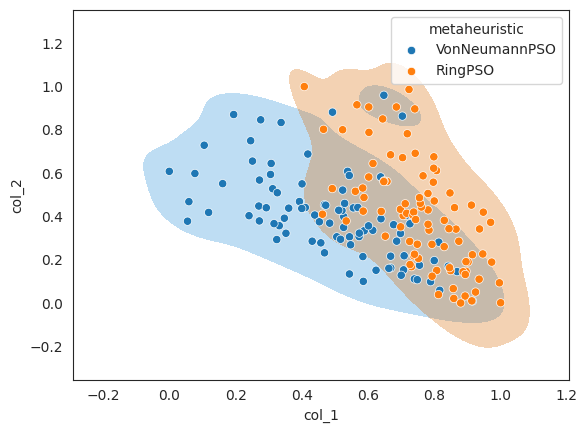

In [24]:
fig, ax = plt.subplots()
sns.set_style("white")
sns.kdeplot(x='col_1', y='col_2', data=prepped_data, hue='metaheuristic', fill=True, alpha=.3, ax=ax, levels=2)
sns.scatterplot(x='col_1', y='col_2', data=prepped_data, hue='metaheuristic', ax=ax)

# Venn Diagram

In [62]:
from sklearn.neighbors import KernelDensity

cols = ['col_2']
data = prepped_data
identifier_head = 'metaheuristic'
# def overlap(data, cols):
# identifiers = data[identifier_head].unique()
identifiers = ['RingPSO', 'RingPSO']
sets_of_points = [data[data[identifier_head] == identifier][cols] for identifier in identifiers]
kdes = [KernelDensity() for _ in identifiers]
[kdes[i].fit(sets_of_points[i]) for i in range(len(kdes))]
all_points = np.vstack(sets_of_points)
log_densities = [kde.score_samples(all_points) for kde in kdes]
probabilities = [np.exp(d) for d in log_densities]
overlap = np.sum(np.min(probabilities)) / np.sum(np.sum(probabilities))
# return overlap * 100

overlap_percentage = overlap * 100

# overlap_percentage = overlap(prepped_data, ['col_1', 'col_2'])
print(f"Estimated overlap percentage: {overlap_percentage:.2f}%")

Estimated overlap percentage: 0.24%


/home/lauren/PycharmProjects/behavioural_benchmarking/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/home/lauren/PycharmProjects/behavioural_benchmarking/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


In [64]:
np.sum(np.minimum(probabilities[0], probabilities[1])) / np.sum(probabilities[0] + probabilities[1]) * 100

np.float64(50.0)

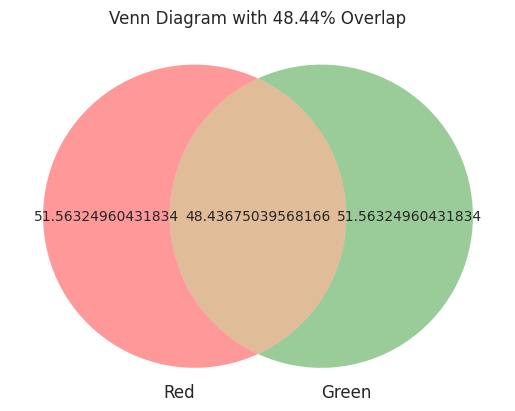

In [175]:
from matplotlib_venn import venn2, venn3

set_size = 100
overlap_size = set_size * (overlap_percentage / 100)
only_red_size = set_size - overlap_size
only_green_size = set_size - overlap_size

# Draw the Venn diagram
venn2(subsets=(only_red_size, only_green_size, overlap_size), set_labels=('Red', 'Green'))

# Add title and display the plot
plt.title(f'Venn Diagram with {overlap_percentage:.2f}% Overlap')
plt.show()